In [ ]:
import pandas as pd

#Carga del csv
db_valle = pd.read_csv("C:\\Users\\Sergio Medina\\Documents\\MINE\\II Semestre\\Seminario de programacion\\Proyecto1_GUMEVA\\pro_gumeva\\DATOS\\db_valle_cauca.csv") 
print(db_valle.head())


  departamento     municipio  codigo_dane                 armas_medios  \
0        VALLE  BUENAVENTURA     76109000  ARMA BLANCA / CORTOPUNZANTE   
1        VALLE     CALI (CT)     76001000  ARMA BLANCA / CORTOPUNZANTE   
2        VALLE     CALI (CT)     76001000  ARMA BLANCA / CORTOPUNZANTE   
3        VALLE       CARTAGO     76147000  ARMA BLANCA / CORTOPUNZANTE   
4        VALLE         DAGUA     76233000  ARMA BLANCA / CORTOPUNZANTE   

  fecha_hecho     genero grupo_etario descripci_n_conducta  cantidad  
0   1/01/2021  MASCULINO      ADULTOS  LESIONES PERSONALES         2  
1   1/01/2021   FEMENINO      ADULTOS  LESIONES PERSONALES         3  
2   1/01/2021  MASCULINO      ADULTOS  LESIONES PERSONALES        11  
3   1/01/2021   FEMENINO      ADULTOS  LESIONES PERSONALES         1  
4   1/01/2021   FEMENINO      ADULTOS  LESIONES PERSONALES         1  


In [9]:
print(db_valle.dtypes)

departamento            object
municipio               object
codigo_dane              int64
armas_medios            object
fecha_hecho             object
genero                  object
grupo_etario            object
descripci_n_conducta    object
cantidad                 int64
dtype: object


In [ ]:
# Convertir la columna a formato fecha
db_valle["fecha_hecho"] = pd.to_datetime(db_valle["fecha_hecho"])
print(db_valle.dtypes)


In [13]:
!pip install seaborn

C:\Users\Sergio Medina\AppData\Local\Temp\ipykernel_15928\4212671731.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='municipio', y='cantidad', data=valle_muni, palette='Blues_r')


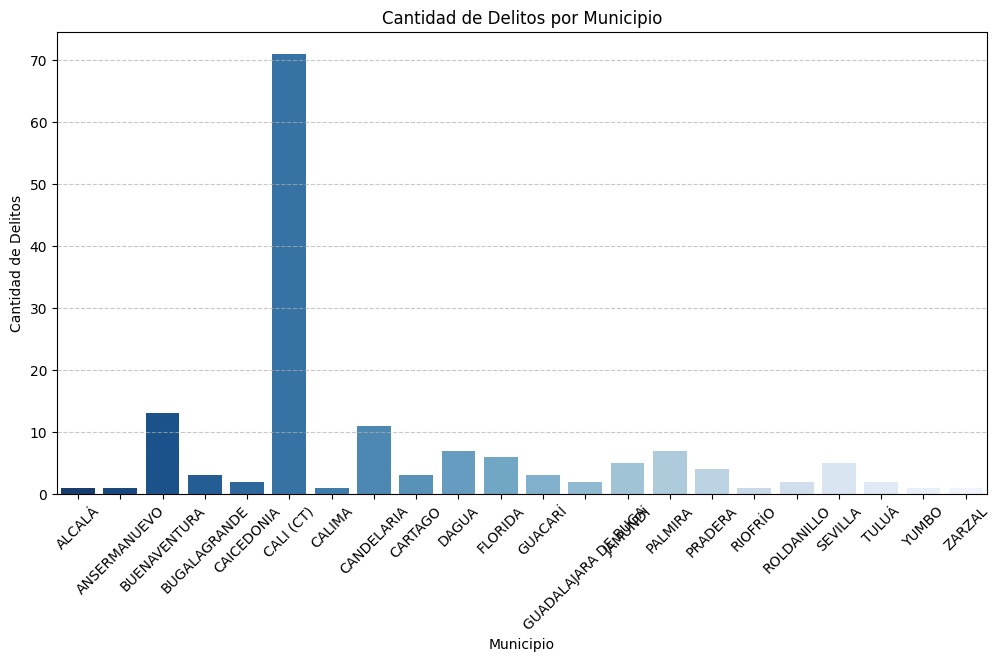

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
 

# Agrupar por municipio y sumar la cantidad de delitos
valle_muni = db_valle.groupby('municipio', as_index=False)['cantidad'].sum()
df_grouped = valle_muni.sort_values(by='cantidad', ascending=False)
 
# Gráfico
plt.figure(figsize=(12, 6))
sns.barplot(x='municipio', y='cantidad', data=valle_muni, palette='Blues_r')
 
plt.xlabel('Municipio')
plt.ylabel('Cantidad de Delitos')
plt.title('Cantidad de Delitos por Municipio')
plt.xticks(rotation=45)  # Rotar etiquetas si hay muchos municipios
plt.grid(axis='y', linestyle='--', alpha=0.7)
 
plt.show()

C:\Users\Sergio Medina\AppData\Local\Temp\ipykernel_15928\626945024.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='municipio', y='cantidad', data=valle_dif_cali, palette='Blues_r')


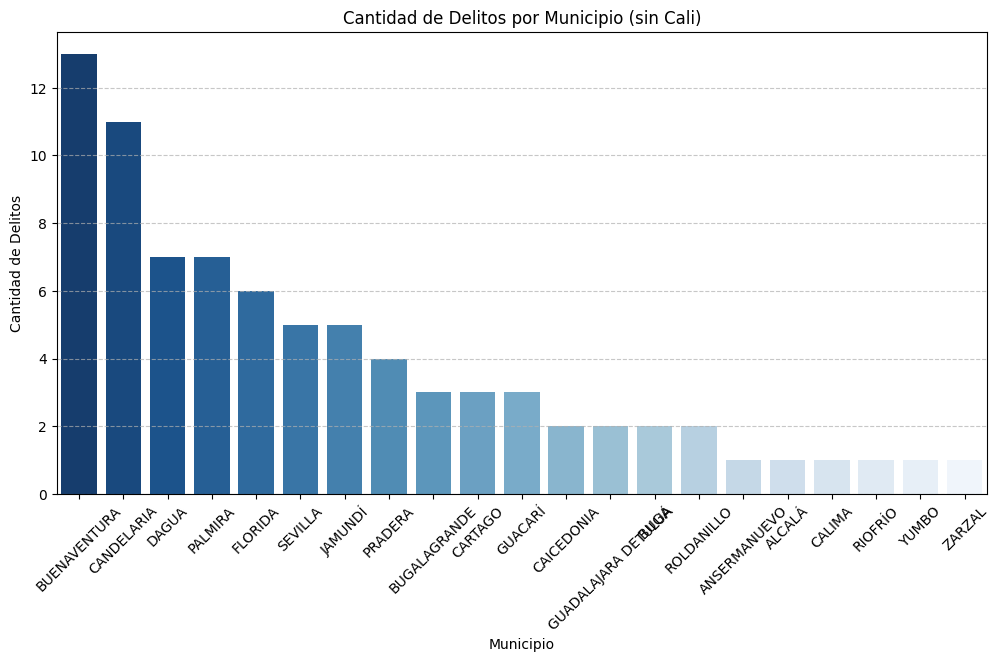

In [ ]:
#Delitos en ciudades diferentes a Cali

valle_dif_cali = db_valle[db_valle['municipio'] != 'CALI (CT)']
 
valle_dif_cali = valle_dif_cali.groupby('municipio', as_index=False)['cantidad'].sum()
valle_dif_cali = valle_dif_cali.sort_values(by='cantidad', ascending=False)
 
plt.figure(figsize=(12, 6))
sns.barplot(x='municipio', y='cantidad', data=valle_dif_cali, palette='Blues_r')
plt.xlabel('Municipio')
plt.ylabel('Cantidad de Delitos')
plt.title('Cantidad de Delitos por Municipio (sin Cali)')
plt.xticks(rotation=45) 
plt.grid(axis='y', linestyle='--', alpha=0.7)
 
plt.show()

In [ ]:


genero = db_valle.groupby('genero', as_index=False)['cantidad'].sum()
print(genero)

      genero  cantidad
0   FEMENINO        40
1  MASCULINO       112


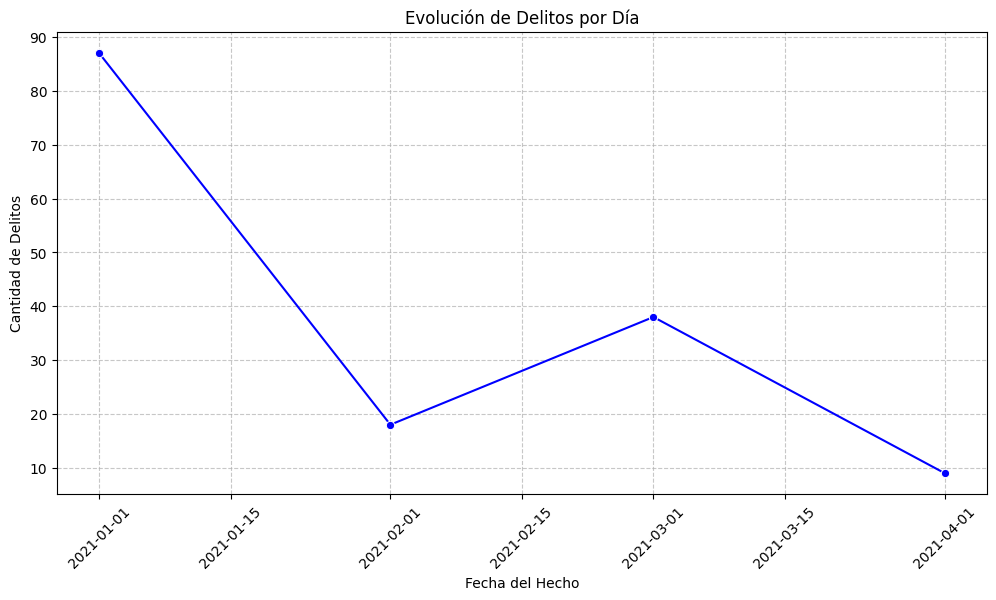

In [ ]:
db_valle['fecha_hecho'] = pd.to_datetime(db_valle['fecha_hecho'], errors='coerce')

df_fecha = db_valle.groupby('fecha_hecho', as_index=False)['cantidad'].sum()

plt.figure(figsize=(12, 6))
sns.lineplot(x='fecha_hecho', y='cantidad', data=df_fecha, marker='o', color='b')

plt.xlabel('Fecha del Hecho')
plt.ylabel('Cantidad de Delitos')
plt.title('Evolución de Delitos por Día')
plt.xticks(rotation=45) 
plt.grid(True, linestyle='--', alpha=0.7)
 

plt.show()

In [ ]:
# Cantidad por tipo de conducta
db_valle_conducta = db_valle.groupby('descripci_n_conducta', as_index=False)['cantidad'].sum()

print(db_valle_conducta)

                             descripci_n_conducta  cantidad
0  LESIONES CULPOSAS ( EN ACCIDENTE DE TRANSITO )        30
1                             LESIONES PERSONALES       122


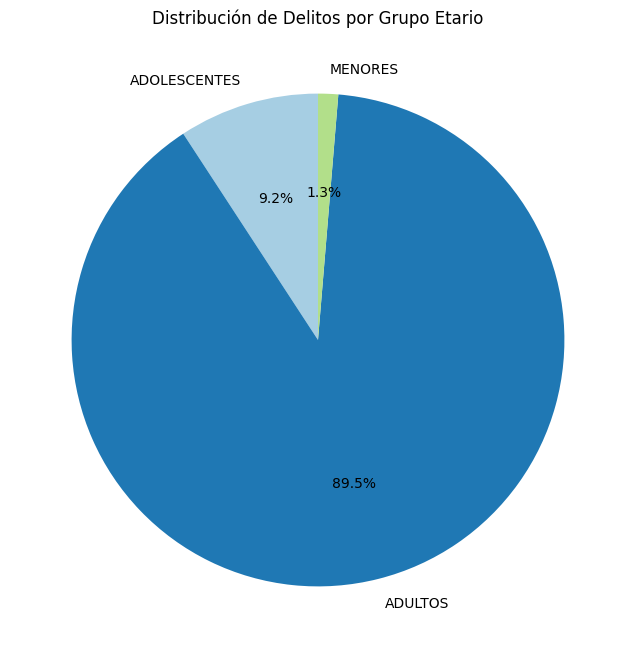

In [31]:
df_pie = db_valle.groupby('grupo_etario', as_index=False)['cantidad'].sum()
 

plt.figure(figsize=(8, 8))
plt.pie(df_pie['cantidad'], labels=df_pie['grupo_etario'], autopct='%1.1f%%', 
        colors=plt.cm.Paired.colors, startangle=90)

plt.title('Distribución de Delitos por Grupo Etario')

plt.show()